**Answer 4.1**

In [1]:
#importing necessary modules
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
ball = pd.read_csv("week4.csv")#loading the csv file of bollinger bands

In [4]:
ball.head()

,Date,Close,Rolling_avg,Upper_band,Lower_band
0,2017-05-15,1559.50,1559.500000,NaN,NaN
1,2017-05-16,1566.55,1563.025000,1572.995206,1553.054794
2,2017-05-17,1552.50,1559.516667,1573.566696,1545.466637
3,2017-05-18,1537.05,1553.900000,1579.126045,1528.673955
4,2017-05-19,1520.60,1547.240000,1584.177474,1510.302526


In [5]:
ball.dropna(inplace=True) # Removing axis having null value

In [6]:
# Making new column"Call" based on conditions of bollinger bands
ball["Call"] = "Buy"
ball.loc[( ball["Rolling_avg"] > ball["Close"] ) & ( ball["Lower_band"] < ball["Close"] ),["Call"]]  = "Hold Buy/ Liquidate Short"
ball.loc[ (ball["Rolling_avg"] < ball["Close"] ) & ( ball["Upper_band"] > ball["Close"] ),["Call"]] = "Hold Short/ Liquidate Buy" 
ball.loc[ball["Close"]>ball["Upper_band"],["Call"]] = "Short"

In [7]:
ball.tail()

,Date,Close,Rolling_avg,Upper_band,Lower_band,Call
489,2019-05-07,1966.30,1987.271429,2046.178509,1928.364348,Hold Buy/ Liquidate Short
490,2019-05-08,1930.75,1980.542857,2042.358487,1918.727227,Hold Buy/ Liquidate Short
491,2019-05-09,1914.60,1973.425000,2041.184311,1905.665689,Hold Buy/ Liquidate Short
492,2019-05-10,1931.70,1966.639286,2030.320972,1902.957599,Hold Buy/ Liquidate Short
493,2019-05-13,1952.90,1963.007143,2023.280314,1902.733972,Hold Buy/ Liquidate Short


In [8]:
#Setting Date as index
ball["Date"] = pd.to_datetime(ball["Date"])
ball.set_index("Date",inplace = True)

In [9]:
#Splitting data into training and testing set
X = ball[["Close","Rolling_avg","Upper_band","Lower_band"]]
Y=ball["Call"]# Call column as target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
#Inintialising different models
models = []
models.append(('LR', LogisticRegression(multi_class = 'ovr',solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RM',RandomForestClassifier()))

LR: 0.934015 (0.934010)   

[[ 10   6   0   0]
 [  0 136  14   0]
 [  0   0 210   0]
 [  0   0   6  12]]
LDA: 0.852808 (0.852792)   

[[  2  14   0   0]
 [  3 124  23   0]
 [  0   0 206   4]
 [  0   0  14   4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

KNN: 0.817462 (0.817259)   

[[  0  16   0   0]
 [  2 127  21   0]
 [  0  16 192   2]
 [  0   0  15   3]]
CART: 0.771730 (0.771574)   

[[  4  11   1   0]
 [  4 124  22   0]
 [  1  23 172  14]
 [  0   0  14   4]]
NB: 0.548101 (0.548223)   

[[  1   9   6   0]
 [  2  24 124   0]
 [  1  18 191   0]
 [  0   2  16   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.553100 (0.553299)   

[[  0   0  16   0]
 [  0   8 142   0]
 [  0   0 210   0]
 [  0   0  18   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RM: 0.807238 (0.794416)   

[[  3  12   1   0]
 [  2 127  21   0]
 [  0  29 181   0]
 [  0   0  16   2]]


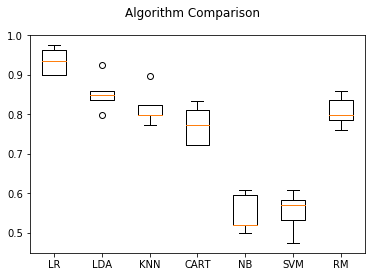

In [11]:
#Testing different models using box plot and printing the accuracy, precision and confusion matrix
results = []
names = []
array = []
scoring = 'accuracy'
seed = 7
cv_num =3
param = 'micro'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    y_train_pred = cross_val_predict(model,X_train,y_train,cv=kfold)
    arrays = confusion_matrix(y_train,y_train_pred)
    results.append(cv_results)
    prec = precision_score(y_train,y_train_pred,average = param)
    names.append(name)
    msg = "%s: %f (%f)  " % (name, cv_results.mean(), prec)
    print(msg,'\n')
    print(arrays)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
#Making a parameter grid for grid search
param_grid =  {'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'class_weight' : ['balanced'],}


In [13]:

clf = LogisticRegression()#Initialising a logistic regression variable
grid_search = GridSearchCV(clf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [14]:
grid_search.fit(X_train,y_train)#Fitting the param_grid to the model

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   17.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'],
                       

In [15]:
best_parameters = grid_search.best_params_  
print(best_parameters)  #Printing the best scoring parameters

{'C': 29.763514416313132, 'class_weight': 'balanced', 'solver': 'lbfgs'}


In [16]:
log_reg = LogisticRegression(C=29.763514416313132,class_weight = 'balanced',solver='lbfgs')#Initialising the model with the best parameters

In [17]:
y_train_pred = cross_val_predict(log_reg,X_train,y_train,cv=3)# Testing the model on training set
prec = precision_score(y_train,y_train_pred,average = 'micro')#Getting the precision scores
print(prec)#Printing the precision scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9847715736040609


In [18]:
#Testing the model on test set
final_pred = cross_val_predict(log_reg,X_test,y_test,cv=3)
prec1 =  precision_score(y_test,final_pred,average = 'micro')
cv_results1 = model_selection.cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')
print(prec1,cv_results1.mean())#Printing the precision, and accuracy scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9595959595959596 0.9847713779011489


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
#Fitting the model on the training set
log_reg.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=29.763514416313132, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
adani = pd.read_csv('ADANIPORTS.csv')#Importing the new stock 

In [20]:
adani.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPORTS,EQ,15-May-2017,357.95,359.00,359.75,350.85,356.00,356.20,354.78,1530781,5.430939e+08,14738,554124,36.20
1,ADANIPORTS,EQ,16-May-2017,356.20,354.20,358.15,351.15,353.55,354.50,354.64,1321254,4.685718e+08,24113,465010,35.19
2,ADANIPORTS,EQ,17-May-2017,354.50,354.50,354.80,347.55,348.95,348.55,349.74,1239867,4.336325e+08,19750,571621,46.10
3,ADANIPORTS,EQ,18-May-2017,348.55,344.30,359.55,342.20,348.15,347.90,350.16,3618961,1.267198e+09,76390,963959,26.64
4,ADANIPORTS,EQ,19-May-2017,347.90,349.05,352.50,345.30,350.45,349.45,348.91,1302961,4.546103e+08,20989,492222,37.78


In [21]:
adani = adani[adani["Series"]=="EQ"]

In [22]:
#Making the bolllinger band columns for adani stock
boll = pd.DataFrame()
boll["Close"] = adani["Close Price"]
std_dev =adani["Close Price"].rolling(14,min_periods=1).std() 
boll["Rolling_avg"] = adani["Close Price"].rolling(14,min_periods =1).mean()#Calculating the 14 day rolling average for close price of HDFC stock
boll["Upper_band"] = boll["Rolling_avg"]+2*(std_dev)#Calculating the upper band
boll["Lower_band"] = boll["Rolling_avg"]-2*(std_dev)#Calculating the lower band

In [23]:
boll.head()

,Close,Rolling_avg,Upper_band,Lower_band
0,356.20,356.200000,NaN,NaN
1,354.50,355.350000,357.754163,352.945837
2,348.55,353.083333,361.117220,345.049447
3,347.90,351.787500,360.147873,343.427127
4,349.45,351.320000,358.856113,343.783887


In [24]:
#Making new column "Call" based on bollinger band conditions
boll.dropna(inplace=True)
boll["Call"] = "Buy"
boll.loc[( boll["Rolling_avg"] > boll["Close"] ) & ( boll["Lower_band"] < boll["Close"] ),["Call"]]  = "Hold Buy/ Liquidate Short"
boll.loc[boll["Close"]>boll["Upper_band"],["Call"]] = "Short"
boll.loc[ (boll["Rolling_avg"] < boll["Close"] ) & ( boll["Upper_band"] > boll["Close"] ),["Call"]] = "Hold Short/ Liquidate Buy"

In [27]:
predicted_call_values =log_reg.predict(boll.iloc[:,:4])#Predicting the values of Call column using the previously fitted model

**Answer 4.2**

In [28]:
axis = pd.read_csv("FORTIS.csv")#Loading new stock data

In [29]:
axis = axis[axis["Series"]=="EQ"]

In [30]:
axis["Perc_oc"] = ((axis["Open Price"] - axis["Close Price"])/axis["Open Price"])*100 #Calculating percentage of open and close price in a day

In [31]:
axis["Perc_hl"] = ((axis["High Price"]-axis["Low Price"])/axis["High Price"])*100 #Calculating percentage of high price and low price in a day

In [32]:
axis.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Perc_oc,Perc_hl
490,FORTIS,EQ,07-May-2019,136.35,136.00,136.70,135.0,135.35,135.2,135.94,165465,2.249316e+07,865,99695,60.25,0.588235,1.243599
491,FORTIS,EQ,08-May-2019,135.20,135.35,135.75,133.3,133.50,133.6,134.16,377871,5.069361e+07,2454,246366,65.20,1.292944,1.804788
492,FORTIS,EQ,09-May-2019,133.60,133.60,133.75,132.3,133.05,133.0,132.89,959494,1.275065e+08,7299,798500,83.22,0.449102,1.084112
493,FORTIS,EQ,10-May-2019,133.00,133.05,133.60,131.0,131.50,131.9,132.55,868778,1.151553e+08,3592,658577,75.80,0.864337,1.946108
494,FORTIS,EQ,13-May-2019,131.90,131.10,132.05,129.2,129.80,129.7,130.51,412786,5.387083e+07,2896,322608,78.15,1.067887,2.158273


In [33]:
#Setting date column as index
axis['Date'] = pd.to_datetime(axis["Date"])
axis.set_index("Date",inplace=True)

In [34]:
#Calculating Day percent change
axis["Day_perc"] = axis["Close Price"].pct_change()*100
axis["Day_perc"][0]=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#Calculating Rolling std
axis["Rolling_std"] = axis["Day_perc"].rolling(5,min_periods=1).std()
axis["Rolling_std"][0]= 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
axis["Rolling_mean"]= axis["Day_perc"].rolling(5,min_periods=1).mean()#Calculating rolling mean

In [37]:
axis.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Perc_oc,Perc_hl,Day_perc,Rolling_std,Rolling_mean
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,FORTIS,EQ,208.40,208.40,209.65,204.05,206.75,205.25,205.66,9078354,1.867055e+09,24607,5980115,65.87,1.511516,2.671119,0.000000,0.000000,0.000000
2017-05-16,FORTIS,EQ,205.25,206.25,209.45,205.45,207.70,207.90,207.86,2146212,4.461109e+08,15071,1127662,52.54,-0.800000,1.909764,1.291108,0.912952,0.645554
2017-05-17,FORTIS,EQ,207.90,208.00,210.80,204.90,205.30,205.90,208.01,3032479,6.307854e+08,21453,1609171,53.06,1.009615,2.798861,-0.962001,1.130554,0.109702
2017-05-18,FORTIS,EQ,205.90,204.00,205.25,195.00,195.80,196.85,200.05,2852401,5.706199e+08,18709,1337328,46.88,3.504902,4.993910,-4.395338,2.434327,-1.016558
2017-05-19,FORTIS,EQ,196.85,197.80,204.90,196.45,204.20,203.55,200.95,4144993,8.329173e+08,37949,1424440,34.37,-2.906977,4.123963,3.403607,2.889988,-0.132525


In [38]:
axis.reset_index(inplace=True)#Resetting the index

In [39]:
#Making a new column Action and calculating it based on close price
axis["Action"] = 1
for i in range(494):
    try:
        if(axis["Close Price"][i+1]<axis["Close Price"][i]):
            axis["Action"][i] = -1 
        
    except KeyError:
        print("Element Exceeded")
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Element Exceeded


In [40]:
axis.tail()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Perc_oc,Perc_hl,Day_perc,Rolling_std,Rolling_mean,Action
489,2019-05-07,FORTIS,EQ,136.35,136.00,136.70,135.0,135.35,135.2,135.94,...,2.249316e+07,865,99695,60.25,0.588235,1.243599,-0.843418,0.372846,-0.566585,-1
490,2019-05-08,FORTIS,EQ,135.20,135.35,135.75,133.3,133.50,133.6,134.16,...,5.069361e+07,2454,246366,65.20,1.292944,1.804788,-1.183432,0.442451,-0.724192,-1
491,2019-05-09,FORTIS,EQ,133.60,133.60,133.75,132.3,133.05,133.0,132.89,...,1.275065e+08,7299,798500,83.22,0.449102,1.084112,-0.449102,0.450043,-0.712966,-1
492,2019-05-10,FORTIS,EQ,133.00,133.05,133.60,131.0,131.50,131.9,132.55,...,1.151553e+08,3592,658577,75.80,0.864337,1.946108,-0.827068,0.273482,-0.863871,-1
493,2019-05-13,FORTIS,EQ,131.90,131.10,132.05,129.2,129.80,129.7,130.51,...,5.387083e+07,2896,322608,78.15,1.067887,2.158273,-1.667930,0.457581,-0.994190,1


In [41]:
axis.drop(axis.index[493],inplace=True)

In [42]:
cls = RandomForestClassifier()# Intialising a RandomForest Classifier

In [43]:
#Initialising and Scaling values
X = axis[["Perc_oc","Perc_hl","Rolling_std","Rolling_mean"]].iloc[1:]
Y = axis["Action"].iloc[1:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.41440413, -0.60044243, -0.73893269,  0.60868708],
       [ 0.31150607, -0.25329968, -0.60571652,  0.14043009],
       [ 1.31246684,  0.6037434 ,  0.19245446, -0.84375844],
       ...,
       [ 0.42516077, -0.64142945, -1.02697319, -0.58827303],
       [ 0.08666132, -0.92281297, -1.02232569, -0.57846296],
       [ 0.2532289 , -0.5862521 , -1.13041616, -0.71033213]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,Y, test_size=0.2, random_state=42)#Splitting the values into training and testing data

In [45]:
kfold = model_selection.KFold(n_splits=3, random_state=7)
cv_results = model_selection.cross_val_score(cls, X_train, y_train, cv=kfold, scoring='accuracy')
y_train_pred = cross_val_predict(cls,X_train,y_train,cv=kfold)#Predicting the values
prec = precision_score(y_train,y_train_pred,average = 'micro')#Calculating precision
without_scale1 = cv_results.mean()#Calculating accuracy
without_scale2 = prec
print(prec,cv_results.mean(),cv_results.std())#Printing the precision and accuracy of the model

0.5318066157760815 0.5623409669211196 0.021888868363976143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [46]:
cls1 = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=1,min_samples_split=2, n_estimators=400)

In [49]:
kfold = model_selection.KFold(n_splits=3, random_state=7)
cv_results = cross_val_score(cls1, X_train, y_train, cv=kfold, scoring='accuracy')
y_train_pred = cross_val_predict(cls1,X_train,y_train,cv=kfold) #Predicting the values
prec = precision_score(y_train,y_train_pred,average = 'micro') #Calculating precision
without_scale1 = cv_results.mean() #Calculating accuracy
without_scale2 = prec
print(prec,cv_results.mean(),cv_results.std())#Printing the precision and accuracy on new model with different parameters

0.5521628498727735 0.5521628498727735 0.007197015584595915


In [50]:
cumu_ret = (axis["Day_perc"]+1).cumprod() - 1 #Calculating cumulative returns

In [51]:
cumu_ret.tail()

488   -7.544116e+28
489   -1.181275e+28
490    2.166836e+27
491    1.193706e+27
492    2.064304e+26
Name: Day_perc, dtype: float64

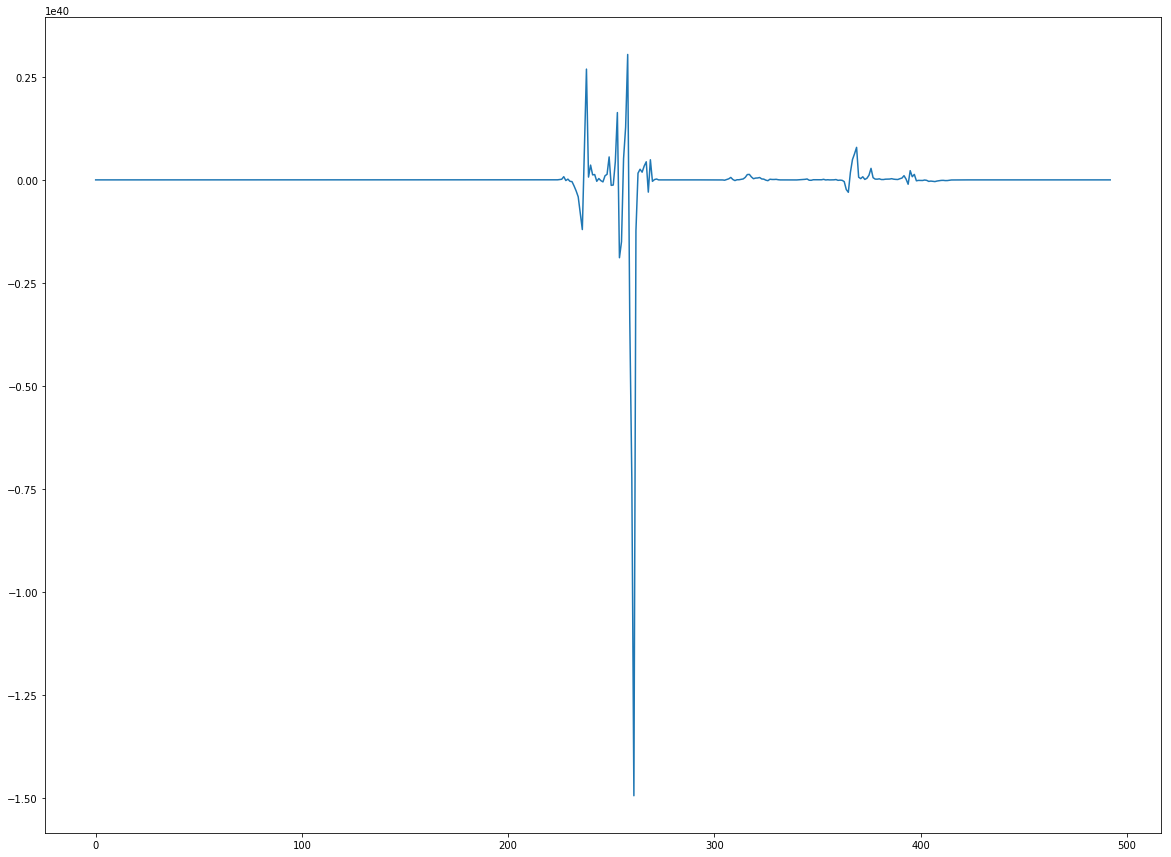

In [52]:
plt.figure(figsize=(20,15))
plt.plot(cumu_ret) #Plotting the cumulative returns